In [9]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
from tblib import lattice
from tblib import hamiltonian

reload(lattice)
reload(hamiltonian)

<module 'tblib.hamiltonian' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\hamiltonian.py'>

In [10]:
k=np.linspace(0,np.pi, 100)

In [11]:
N=2

lat = lattice.dDiagonallyStripedLattice(N=N)
ham = hamiltonian.Model(N=N, T=0, kind='dDSL', delta=[1,1], ns=[1,1], U=[1,1], mu=[0,0])
 

#lat.plot_lattice();

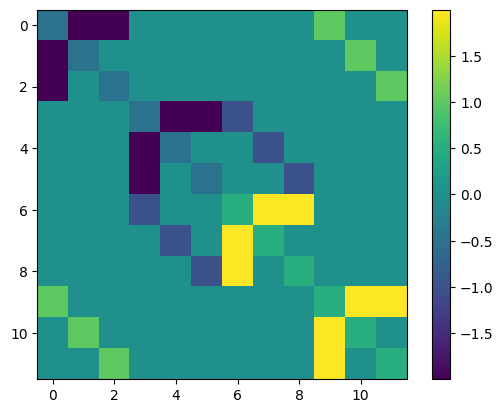

In [12]:
plt.imshow(np.real(ham.Hk(k[2], k[2])[0]))
plt.colorbar()

In [13]:
ham.DeltaN(40, False)

([(0.25284016087148986-1.269787865257851e-35j),
  (0.3500268781857247-3.204830288979802e-34j)],
 [0.0, 0.0])

In [14]:
#ham.plot_bands(k)

In [15]:
dels, nus, mus = ham.Deltra(40,HF=True, alpha=0.7, Nmin=20, Nmax=50)

In [16]:
dels

array([[1.00000000e+00+0.00000000e+00j, 7.75852048e-01-3.80936360e-36j,
        6.08125693e-01-1.71984537e-35j, 4.81427904e-01-3.65847426e-39j,
        3.84880510e-01-1.67701330e-35j, 3.10670679e-01+5.56961477e-23j,
        2.53119884e-01+6.98443747e-23j, 2.08070054e-01+6.52802507e-23j,
        1.72462939e-01+1.98241329e-22j, 1.44041862e-01+2.18773094e-22j,
        1.21135823e-01+1.93388908e-22j, 1.02501937e-01+1.54447429e-22j,
        8.72103052e-02+1.16302818e-22j, 7.45600178e-02+8.42660044e-23j,
        6.40180206e-02+5.94092555e-23j, 5.51747542e-02+4.10399223e-23j,
        4.77120578e-02+1.89912731e-23j, 4.13800089e-02+8.06257614e-24j,
        3.59802254e-02+2.87387459e-24j, 3.13537987e-02+5.70923195e-25j,
        2.73725014e-02-3.33166958e-25j, 2.39322842e-02+3.24509157e-22j,
        2.09483677e-02+3.84083615e-22j, 1.83514492e-02+3.40927779e-22j,
        1.60847036e-02+2.69104213e-22j, 1.41013641e-02+1.99280472e-22j,
        1.23627443e-02+1.41813505e-22j, 1.08366191e-02+9.8237959

In [17]:
dels[:,-1]

array([0.00071305+1.60690484e-26j, 0.00065595-9.01503189e-27j])

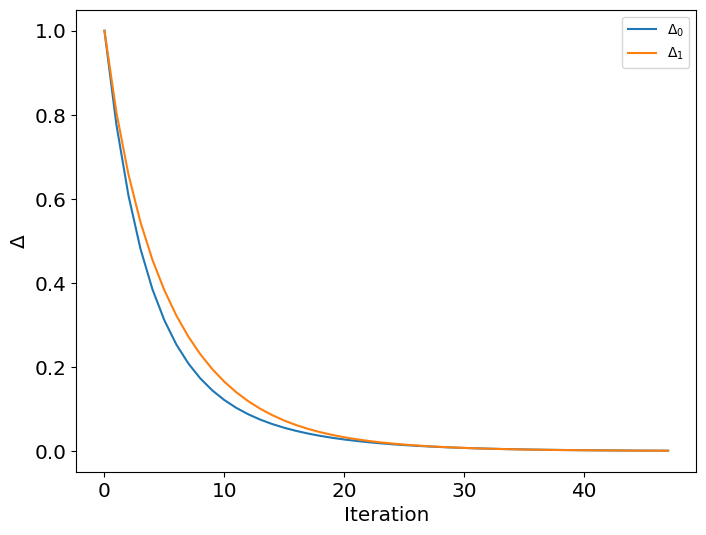

In [18]:
plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\Delta$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)

#plt.plot(np.arange(len(dels[0])), dels[0], label = r'$\Delta_A$')
#plt.plot(np.arange(len(dels[0])), dels[1], label = r'$\Delta_B$')
#plt.plot(np.arange(len(dels[0])), dels[2], label = r'$\Delta_C$')
for i,d in enumerate(dels):
    plt.plot(np.arange(len(dels[0])), np.real(d), label = f'$\Delta_{i}$')

plt.legend()

plt.show()

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


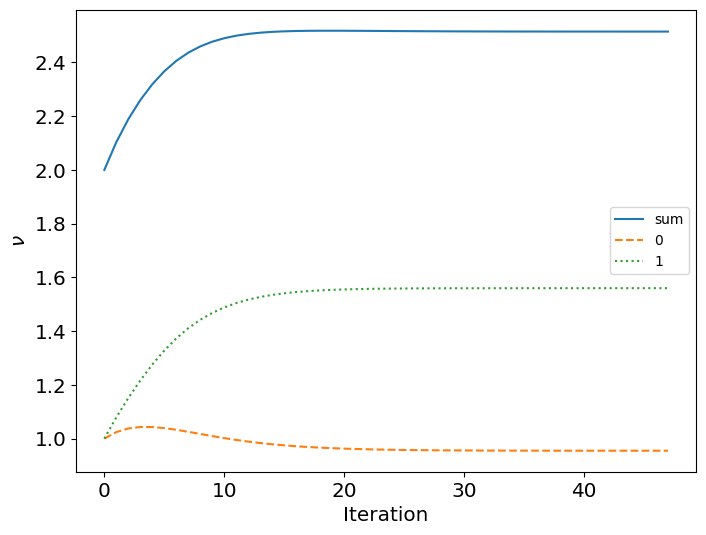

In [19]:
s1 = [np.sum(nus[:,i]) for i in range(np.shape(nus)[1])]

plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\nu$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)
colors=['dashed', 'dotted', 'dashdot']
plt.plot(np.arange(len(s1)), s1, label = r'sum')
for i in range(2):
    plt.plot(np.arange(len(s1)),nus[i],linestyle=colors[i], label=f'{i}')

plt.legend()
plt.show()

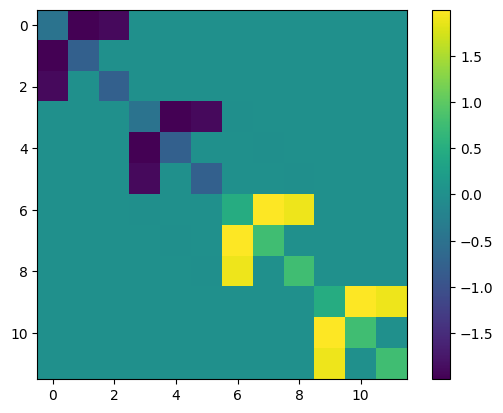

In [20]:
plt.imshow(np.real(ham.Hk(k[20], k[2])[0]))
plt.colorbar()

In [21]:
#ham.plot_bands(k)

In [22]:
ham.delta

array([0.00071305+1.60690484e-26j, 0.00065595-9.01503189e-27j])

Earr = np.linspace(-2.5,2.5,350)
DOS = np.zeros(350)
for i in range(1):
    DOS+=ham.DOS(Earr,k, b=i,p='all')

plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
plt.xlim(-0.6, 0.6)
#plt.ylim(0, 1e5)
plt.plot(Earr, DOS)
#plt.vlines([emax, -emax], 0, 100, colors='black')

plt.show()

In [23]:
np.linspace(-np.pi, np.pi*0.1, 5)

array([-3.14159265, -2.27765467, -1.41371669, -0.54977871,  0.31415927])

In [24]:
sfws, sdsfw = ham.detSFW(30)


In [25]:
sdsfw

(0.15683107834219015-2.7670095065988734e-21j)

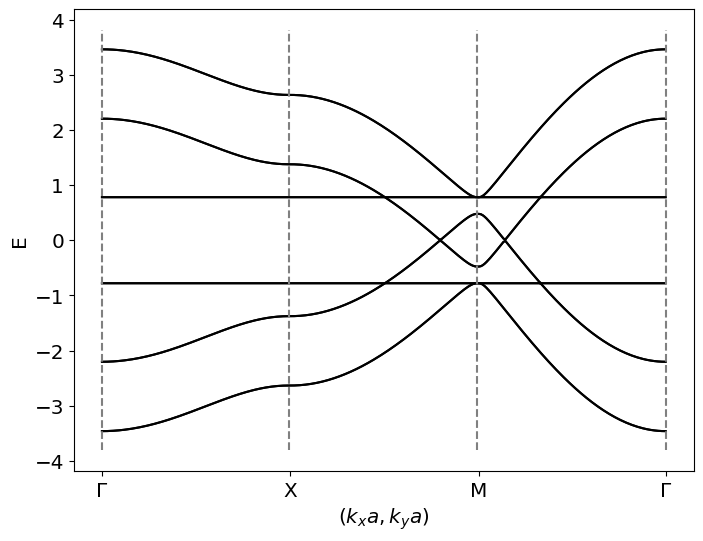

In [26]:
ham.plot_bands()

In [27]:
A = []
for n in np.linspace(5,40,5):
    sfw1 = ham.SFW(int(n), my='x', ny='y')
    A.append(sfw1)

In [28]:
A

[(-4.235164736271502e-24+1.0459291737720434e-42j),
 (7.154850341741182e-18-1.4868284612247933e-33j),
 (4.29999097658413e-18+7.846297280518997e-35j),
 (5.130126218729844e-18-3.0071850077314793e-33j),
 (2.166986623575542e-18-9.442101625080649e-34j)]

In [29]:
ham.detSFW(30)

(array([[-1.56831078e-01+2.76700951e-21j,  6.23710405e-18+1.58118902e-32j],
        [ 6.23700429e-18+1.55344626e-32j, -1.56831078e-01+2.76700951e-21j]]),
 (0.15683107834219015-2.7670095065988734e-21j))

In [30]:
ham.ns

array([0.95500842+5.70238113e-26j, 1.55999995-1.64324641e-33j])

In [31]:
sfw1/20**2

(5.417466558938855e-21-2.3605254062701624e-36j)

In [32]:
def fermidirac(E,T=0,o=0):

    nE=0
    if o==0:
        if np.abs(E)<1e-14 and T!=0:
            nE = 1
        elif T==0:
            if E>0:
                nE = 0
            else:
                nE = 1
        else:
            nE = 1/(1+np.exp(E/T))
    elif o==1:
        if np.abs(E)<1e-14 and T!=0:
            nE = 1/(4*T)
        elif T==0:
            nE = 0
        else:
            nE = 1/((1+np.exp(E/T))**2)*np.exp(E)/T

    return nE


def SFW(kx, ky, T=0, my='x', ny='y'):

    gammaz = np.kron(np.diag([1,-1]), np.eye(6))
    sum = 0
    karr = np.linspace(-np.pi,np.pi*0.1,N)
    
    pflist = []
    slist = []

    evals, evec = np.linalg.eigh(ham.Hk(kx,ky)[0])
    Evec = evec.T 

    nE = [fermidirac(E,T,o=0) for E in evals]
    dnE = [fermidirac(E,T,o=1) for E in evals]
    for k,i in enumerate(evals):
        for l,j in enumerate(evals):
            if np.abs(i-j)<1e-10 or k==l:
                pf = -dnE[l]
            else:
                pf = (nE[l]-nE[k])/(i-j)

            f1 = np.matmul(np.conjugate(Evec[k]),np.matmul(ham.Hk(kx,ky,o=my)[0],Evec[l]))
            f2 = np.matmul(np.conjugate(Evec[l]),np.matmul(ham.Hk(kx,ky,o=ny)[0],Evec[k]))

            M1 = np.matmul(ham.Hk(kx,ky,o=my)[0],gammaz)
            M2 = np.matmul(gammaz,ham.Hk(kx,ky,o=ny)[0])

            f3 = np.matmul(np.conjugate(Evec[l]),np.matmul(M1,Evec[k]))
            f4 = np.matmul(np.conjugate(Evec[k]),np.matmul(M2,Evec[l]))

            slist.append((pf*(f1*f2-f3*f4),i,j, f1,f2))
            sum+=pf*(f1*f2-f3*f4)

    return sum, pflist, slist

In [33]:
for kx in karr:
            for ky in karr:

SyntaxError: incomplete input (1287918356.py, line 2)

In [ ]:
sfw = SFW(-np.pi,0.2)

In [ ]:
sfw[0]

In [ ]:
sfw[-1]

In [ ]:
sfw[2]

In [ ]:
sfw[-1]

In [ ]:
0.076265*0.1188

In [ ]:
0.068012*0.105988

In [ ]:
sfw[3][0]*sfw[3][1]-sfw[3][2]*sfw[3][3]